### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [3]:
path = r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Intro to Machine Learning\Data Sets'

In [4]:
df = pd.read_csv(os.path.join(path, 'cleaned_weather_date.csv'), index_col = 0)

In [5]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,20221028,10,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,20221029,10,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,20221030,10,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [6]:
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Isolating 2000-2009 from Data

In [9]:
df2000 = df[
    (df['DATE'].astype(str).str[:4] >= '2000') &
    (df['DATE'].astype(str).str[:4] <= '2009')
]

In [10]:
df2000

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,2.8,4,0.79,1.0154,0.22,1.05,1.2,8.6,7.3,9.9
14613,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,4.6,6,0.76,1.0099,0.36,0.34,3.5,8.1,5.0,7.7
14614,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,2.9,7,0.81,0.9957,0.12,0.33,0.0,7.7,4.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,12,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,...,-2.7,4,0.72,1.0039,0.37,0.01,4.7,7.2,5.8,8.5
18259,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,2.4,8,0.70,0.9975,0.22,1.25,0.0,4.8,1.4,8.3
18260,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,0.8,8,0.88,0.9866,0.12,2.84,0.0,3.4,2.6,4.2
18261,20091230,12,8,0.92,0.9979,0.18,1.54,0.0,8.5,7.5,...,-7.4,8,0.87,0.9862,0.12,1.46,0.0,3.1,2.1,4.2


In [11]:
pleasant2000 = pleasant[
    (pleasant['DATE'].astype(str).str[:4] >= '2000') &
    (pleasant['DATE'].astype(str).str[:4] <= '2009')
]

In [12]:
pleasant2000

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,20000102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,20000103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,20000104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,20000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,20091227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,20091228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,20091229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,20091230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df2000.drop(['DATE', 'MONTH'], axis=1, inplace=True)

C:\Users\Stugots\AppData\Local\Temp\ipykernel_11704\4000239814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000.drop(['DATE', 'MONTH'], axis=1, inplace=True)


In [14]:
pleasant2000.drop('DATE', axis=1, inplace=True)

C:\Users\Stugots\AppData\Local\Temp\ipykernel_11704\2329486596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pleasant2000.drop('DATE', axis=1, inplace=True)


In [15]:
df2000

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,7,...,0.7,6,0.89,1.0235,0.22,0.10,0.7,6.6,2.1,11.0
14611,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,2.0,8,0.92,1.0177,0.13,0.42,0.0,9.6,7.3,10.6
14612,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,5,...,2.8,4,0.79,1.0154,0.22,1.05,1.2,8.6,7.3,9.9
14613,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,7,...,4.6,6,0.76,1.0099,0.36,0.34,3.5,8.1,5.0,7.7
14614,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,7,...,2.9,7,0.81,0.9957,0.12,0.33,0.0,7.7,4.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,5.5,8,...,-2.7,4,0.72,1.0039,0.37,0.01,4.7,7.2,5.8,8.5
18259,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8,4,...,2.4,8,0.70,0.9975,0.22,1.25,0.0,4.8,1.4,8.3
18260,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0,6,...,0.8,8,0.88,0.9866,0.12,2.84,0.0,3.4,2.6,4.2
18261,8,0.92,0.9979,0.18,1.54,0.0,8.5,7.5,11.5,6,...,-7.4,8,0.87,0.9862,0.12,1.46,0.0,3.1,2.1,4.2


In [16]:
pleasant2000

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Converting to Array 

In [18]:
X = df2000
y = pleasant2000

In [19]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [20]:
X.shape

(3653, 135)

In [21]:
y.shape

(3653, 15)

### Split Data

In [23]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
y_train = np.argmax(y_train, axis = 1)

In [25]:
y_test = np.argmax(y_test, axis = 1)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(914, 135) (914,)


### Grid Search

In [28]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

In [29]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [30]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Stugots\anaconda3\envs\quandl-env\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Stugots\anaconda3\envs\quandl-env\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Stugots\anaconda3\envs\quandl-env\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Stugots\anaconda3\envs\quandl-env\lib\sit

Search took 0.5653093218803406 minutes


In [56]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.8528660094925155


### Random Search Optimization

In [59]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [61]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [63]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Stugots\anaconda3\envs\quandl-env\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Search took 0.1605614463488261 minutes


In [65]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': np.int64(6), 'n_estimators': np.int64(360)}
Best RANDOM search score is: 0.8346111719605696


In [67]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.8528660094925155
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': np.int64(6), 'n_estimators': np.int64(360)}
Best RANDOM search score is: 0.8346111719605696


In [ ]:
# Search score for the grid method was higher so we will use these hyperparameters to run the model 

### Random Forest Classifier

In [69]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3= RandomForestClassifier(n_estimators = 200 , max_depth = None , max_features = 7, min_samples_leaf = 1, min_samples_split = 2)


clf3.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8708971553610503


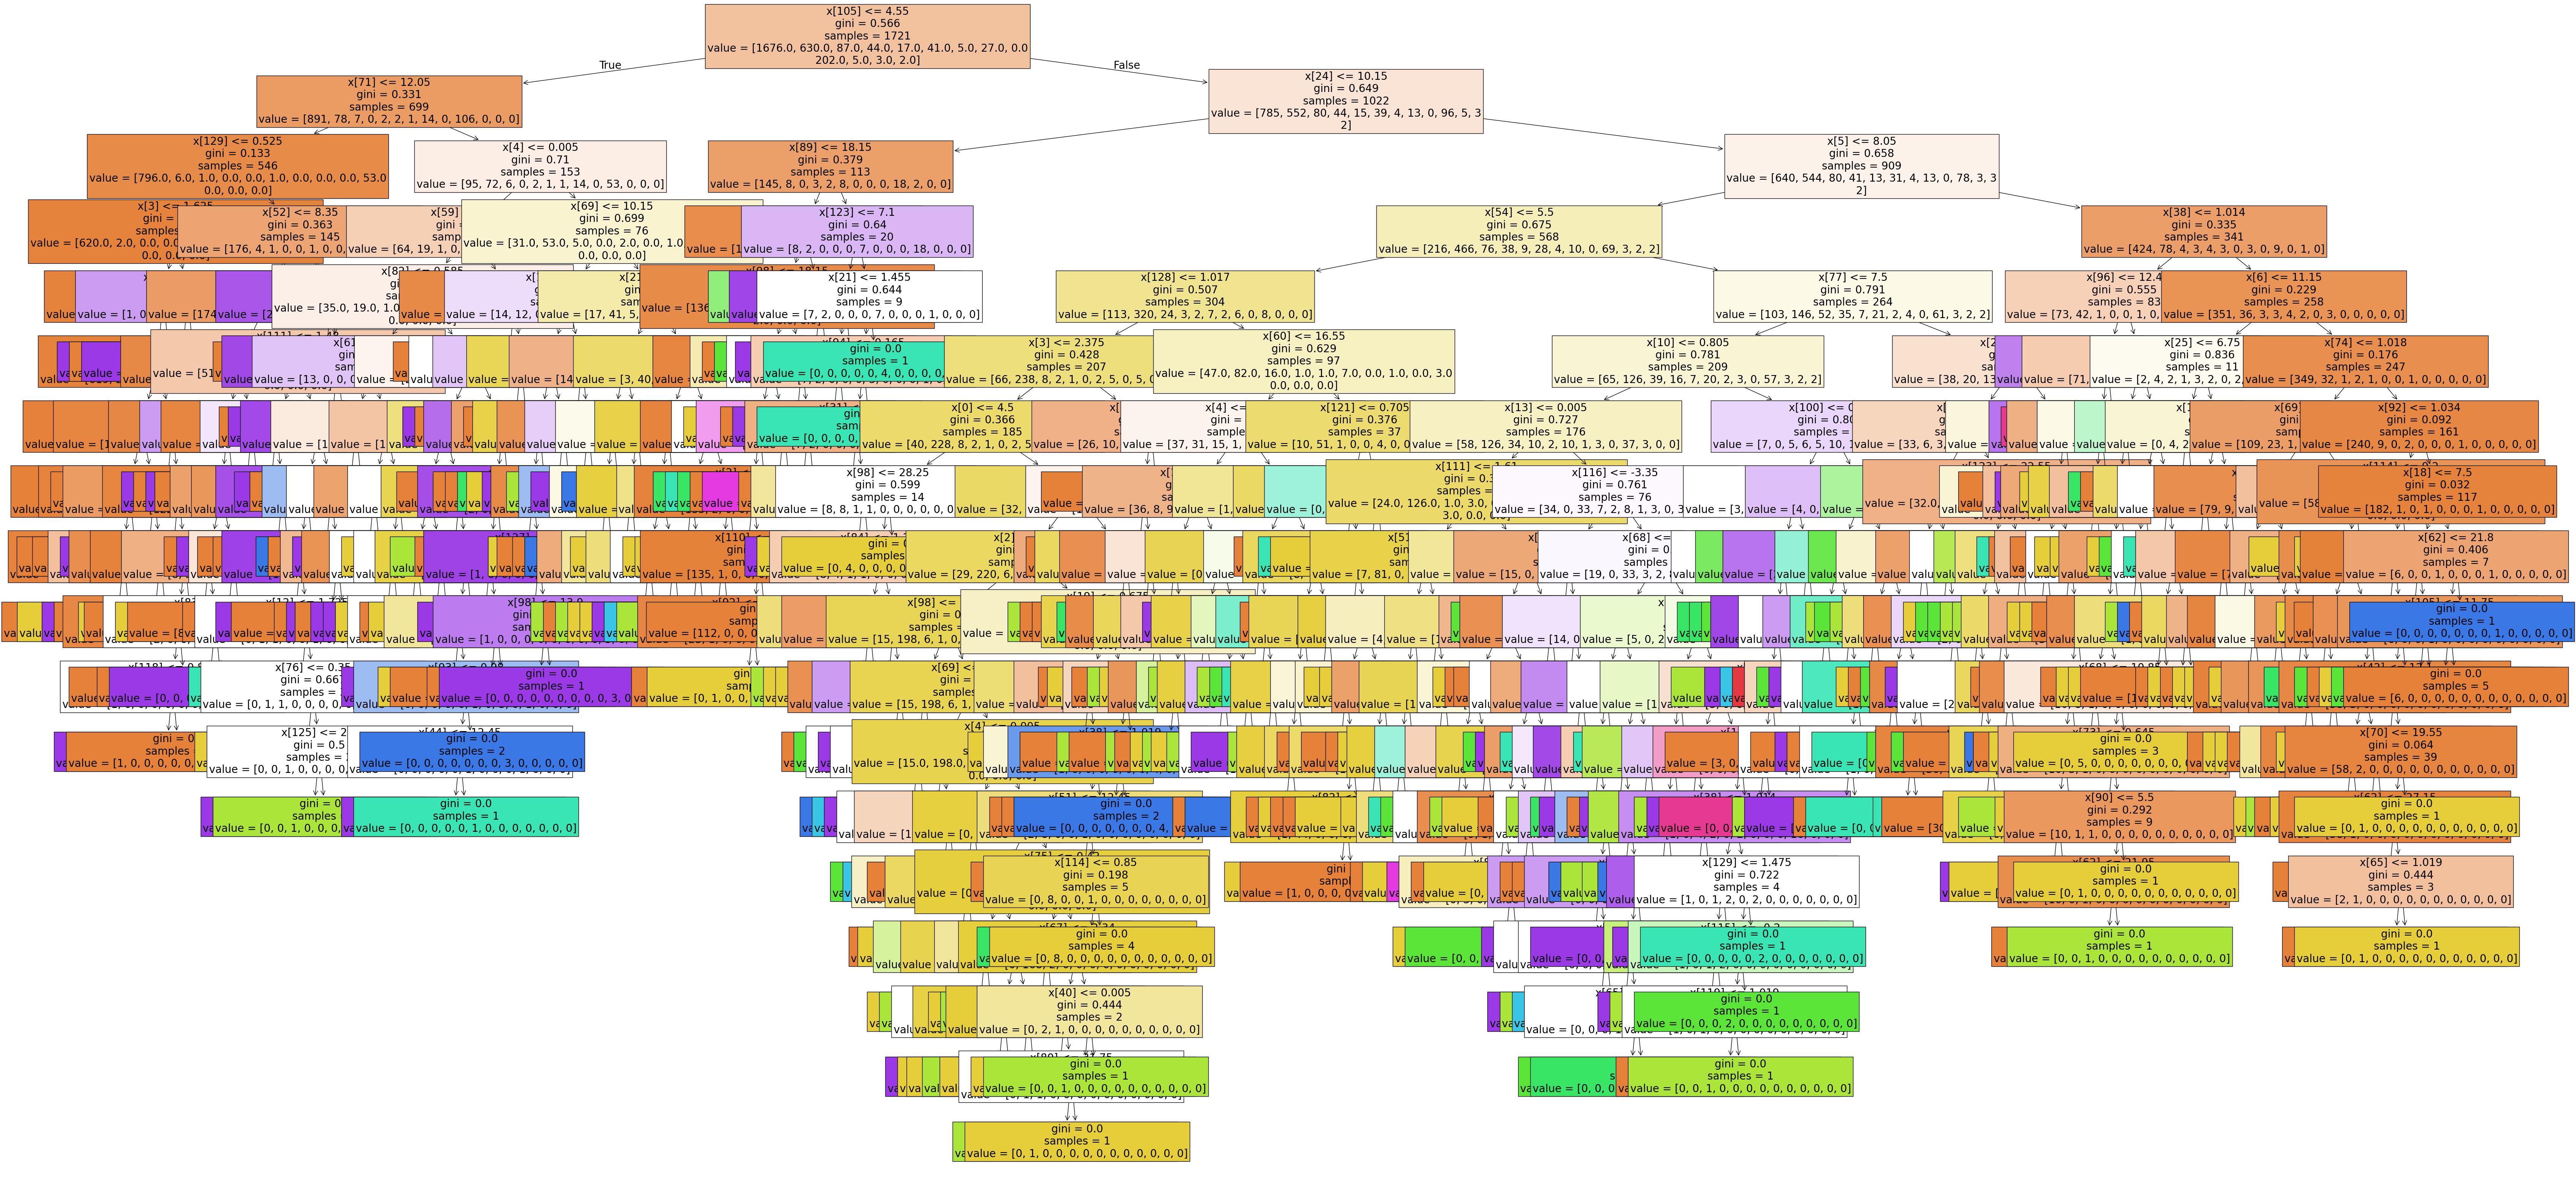

In [75]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, filled=True);

In [77]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape) # Should print: (135,)
newarray

(135,)


array([0.01323116, 0.01179103, 0.00673547, 0.01659292, 0.070692  ,
       0.01894981, 0.01013806, 0.00706004, 0.01636163, 0.00866008,
       0.00766191, 0.00702257, 0.0130656 , 0.03162127, 0.01035394,
       0.01683323, 0.0107747 , 0.02351169, 0.00317979, 0.00599794,
       0.00617488, 0.00862057, 0.00573013, 0.00642937, 0.01311996,
       0.00830345, 0.01887317, 0.0026828 , 0.00369204, 0.00616606,
       0.0059845 , 0.00378372, 0.003829  , 0.00584196, 0.00385803,
       0.00938395, 0.00329125, 0.00358454, 0.00623002, 0.00506735,
       0.00405982, 0.00478181, 0.00661481, 0.004465  , 0.00855047,
       0.00210972, 0.00403988, 0.00523518, 0.00519502, 0.00244576,
       0.00304216, 0.00602576, 0.004597  , 0.00770752, 0.00294041,
       0.00361962, 0.00755241, 0.00523858, 0.00397008, 0.00374731,
       0.00659851, 0.00516301, 0.00961957, 0.00293558, 0.00494283,
       0.00582195, 0.00770683, 0.00412828, 0.00481343, 0.01316813,
       0.00615941, 0.01820145, 0.0027229 , 0.0035345 , 0.00665

In [79]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01323116, 0.01179103, 0.00673547, 0.01659292, 0.070692  ,
         0.01894981, 0.01013806, 0.00706004, 0.01636163],
        [0.00866008, 0.00766191, 0.00702257, 0.0130656 , 0.03162127,
         0.01035394, 0.01683323, 0.0107747 , 0.02351169],
        [0.00317979, 0.00599794, 0.00617488, 0.00862057, 0.00573013,
         0.00642937, 0.01311996, 0.00830345, 0.01887317],
        [0.0026828 , 0.00369204, 0.00616606, 0.0059845 , 0.00378372,
         0.003829  , 0.00584196, 0.00385803, 0.00938395],
        [0.00329125, 0.00358454, 0.00623002, 0.00506735, 0.00405982,
         0.00478181, 0.00661481, 0.004465  , 0.00855047],
        [0.00210972, 0.00403988, 0.00523518, 0.00519502, 0.00244576,
         0.00304216, 0.00602576, 0.004597  , 0.00770752],
        [0.00294041, 0.00361962, 0.00755241, 0.00523858, 0.00397008,
         0.00374731, 0.00659851, 0.00516301, 0.00961957],
        [0.00293558, 0.00494283, 0.00582195, 0.00770683, 0.00412828,
         0.00481343, 0.01316813, 0.0061594

In [81]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.17155212, 0.12950502, 0.07642926, 0.04522205, 0.04664507,
       0.04039801, 0.04844949, 0.06787789, 0.04630159, 0.09820859,
       0.07103612, 0.03598409, 0.04721362, 0.03709606, 0.03808103])

In [83]:
station = [col.split('_')[0] for col in df2000.columns if '_' in col]

# Step 2: Get unique station names
stations = set(station)
stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [85]:
important = pd.Series(sumarray, index = stations)
important = important.sort_values(ascending = False)
important

MUNCHENB      0.171552
SONNBLICK     0.129505
VALENTIA      0.098209
OSLO          0.076429
HEATHROW      0.071036
BUDAPEST      0.067878
MADRID        0.048449
LJUBLJANA     0.047214
BASEL         0.046645
DUSSELDORF    0.046302
BELGRADE      0.045222
DEBILT        0.040398
STOCKHOLM     0.038081
MAASTRICHT    0.037096
KASSEL        0.035984
dtype: float64

{'MUNCHENB', 'SONNBLICK', 'OSLO', 'BELGRADE', 'BASEL', 'DEBILT', 'MADRID', 'BUDAPEST', 'DUSSELDORF', 'VALENTIA', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'STOCKHOLM'}


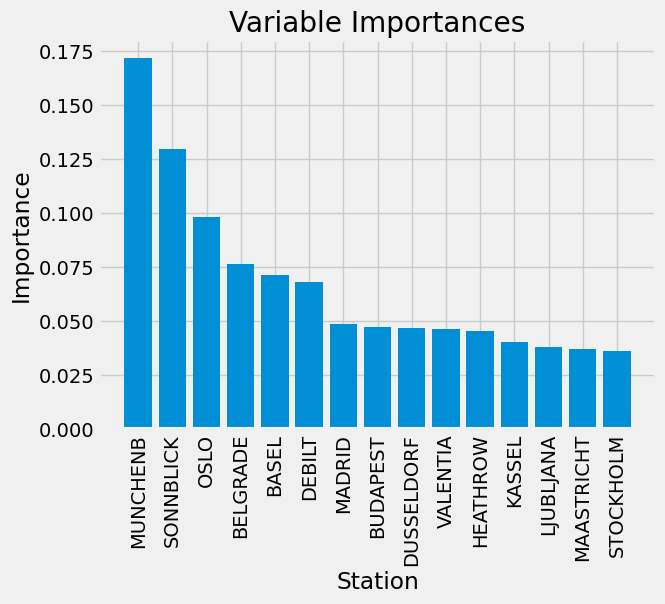

In [87]:
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Station'); plt.title('Variable Importances');